# Hypothesis Testing

## Import Libraries

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg
import seaborn as sns

## Import Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv')
mc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#info mengenai dataframe, memastikan kesesuaian jenis data yang dibutuhkan pada Education dan Income
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#memastikan untuk menghapus data yang tidak relevan, untuk nilai Income yang negatif
mc.loc[mc.Income<0].shape[0]

0

In [ ]:
#hanya mengambil kolom yang dibutuhkan, yaitu Education dan Income
mcei = mc[['Education','Income']]
mcei

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
4,PhD,58293.0
...,...,...
2235,Graduation,61223.0
2236,PhD,64014.0
2237,Graduation,56981.0
2238,Master,69245.0


In [ ]:
#membuat copy dari mcei untuk dirapikan
df = mcei.copy()

In [ ]:
#mengurutkan data berdasarkan kolom Education
df.sort_values(by=['Education'], inplace=True)
df.reset_index()

,index,Education,Income
0,1119,2n Cycle,47025.0
1,1549,2n Cycle,37284.0
2,1551,2n Cycle,76800.0
3,459,2n Cycle,66664.0
4,456,2n Cycle,89572.0
...,...,...,...
2235,1840,PhD,32313.0
2236,641,PhD,76140.0
2237,1315,PhD,27238.0
2238,1327,PhD,45503.0


# Statistik Deskriptif Data

In [ ]:
df

,Education,Income
1119,2n Cycle,47025.0
1549,2n Cycle,37284.0
1551,2n Cycle,76800.0
459,2n Cycle,66664.0
456,2n Cycle,89572.0
...,...,...
1840,PhD,32313.0
641,PhD,76140.0
1315,PhD,27238.0
1327,PhD,45503.0


In [ ]:
#statistik deskriptif untuk masing-masing tingkat pendidikan
df.groupby('Education')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
2n Cycle,200.0,47633.190000,22119.081838,7500.0,27526.50,46805.0,65393.25,96547.0
Basic,54.0,20306.259259,6235.066773,7500.0,15405.25,20744.0,24882.00,34445.0
Graduation,1116.0,52720.373656,28177.192681,1730.0,34834.50,52028.5,69930.50,666666.0
Master,365.0,52917.534247,20157.788029,6560.0,37760.00,50943.0,66726.00,157733.0
PhD,481.0,56145.313929,20612.979997,4023.0,40451.00,55212.0,69098.00,162397.0


Kuartil 1,2,3 dari data Income masing-masing tingkat Education dinyatakan dalam kolom 25%, 50%, dan 75%.

Rata-Rata (mean) dari kelima tingkat Education tampak cukup berbeda, dengan rata-rata terendah ada pada Basic, tertinggi pada PhD. Namun kisaran rata-rata dari Graduation, Master, dan PhD tidak berbeda jauh nilainya. Signifikansi dari perbedaan ini akan selanjutnya dianalisis pada bagian uji hipotesis.

Tingkat pesebaran data dari kelima tingkat Education juga terlihat beragam dari standar deviasinya (std), dari yang paling kecil pesebarannya pada kategori Basic, lalu Master, PhD, 2n Cycle, dan yang paling tersebar adalah Graduation.

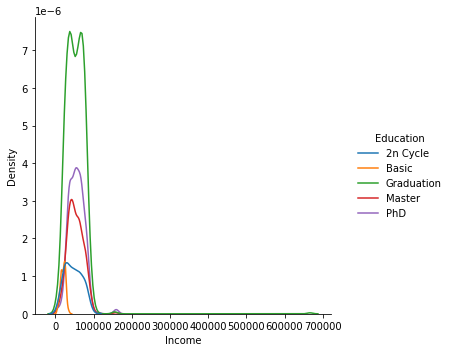

In [ ]:
sns.displot(df, x="Income", hue="Education", kind="kde")

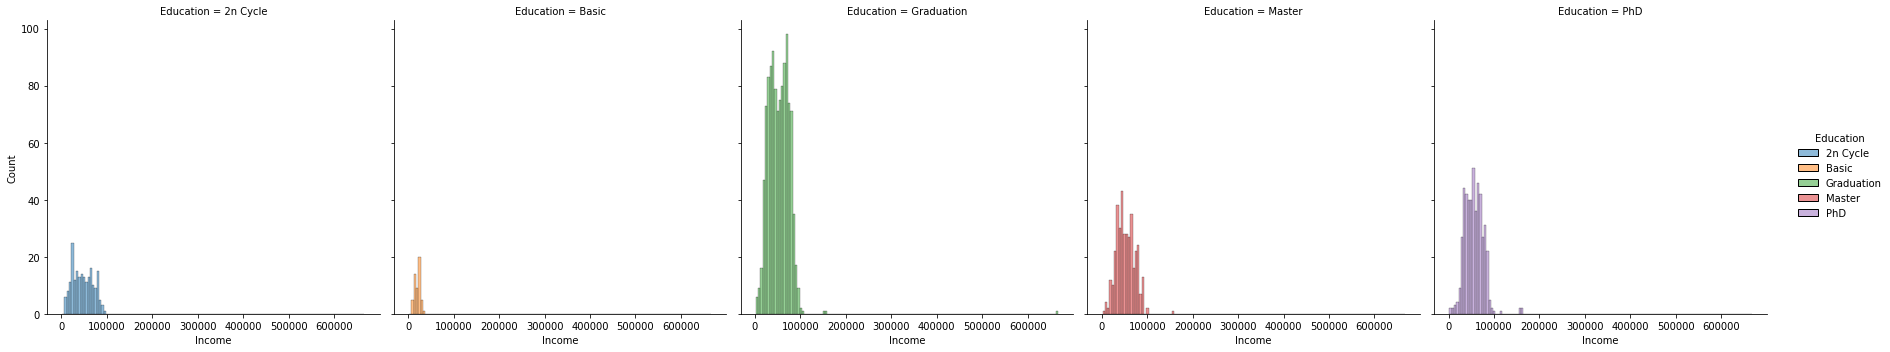

In [ ]:
sns.displot(data=df, x="Income", hue="Education", col="Education")

Tingkat pesebaran juga dapat terlihat dari keenam grafik di atas yang menunjukkan bahwa Basic paling kecil pesebarannya dengan kurva paling lancip dan pendek, lalu Master, PhD yang lebih landai dan secara berturut-turut semakin tinggi puncaknya, lalu 2n Cycle yang puncaknya lebih pendek namun lebih landai lagi dibandingkan Master dan PhD. Dan yang paling tersebar adalah Graduation dengan bentuk kurva yang tidak terlalu lancip dan terdapat dua puncak yang tampaknya hampir setara.

Bentuk sebaran tidak condong ke skewed karena kebanyakan terlihat memiliki puncak di bagian tengah.

Untuk analisis korelasi antar variabel Education dan Income, akan dilakukan dengan ANOVA pada uji hipotesis berikut

# Uji Hipotesis Mengenai Pengaruh Education Terhadap Income

H0 : rata-rata Income dari setiap tingkat pendidikan (Education) tidak berbeda secara signifikan (Education tidak memengaruhi Income)

H1 : rata-rata Income dari setiap tingkat pendidikan (Education) berbeda secara signifikan (Education memengaruhi Income)

In [ ]:
#Dilakukan uji hipotesis menggunakan One-way ANOVA karena terdapat 5 grup sampel tingkat pendidikan
anova_res = df.anova(dv='Income', between='Education', detailed=True)
anova_res.loc[:,['Source','SS','DF','MS','F','p-unc']]

,Source,SS,DF,MS,F,p-unc
0,Education,6.707271e+10,4,1.676818e+10,27.739182,1.667728e-22
1,Within,1.336537e+12,2211,6.044943e+08,NaN,NaN


p-value sangat kecil yaitu 1.667728 x 10^-22 (sangat mendekati nol), artinya perbedaan rata-rata antar kelompok tingkat pendidikan sangat signifikan.

F-value sangat besar yaitu 27.739182, artinya varians Income antar kelompok tingkat pendidikan jauh lebih tinggi dibandingkan varians Income dalam suatu kelompok.

Hasil ANOVA menyimpulkan bahwa rata-rata Income dari bedanya tingkat pendidikan (Education), berbeda secara signifikan. Nilai income tidak mungkin berasal dari populasi atau grup yang sama. 
Sehingga, jelas tingkat pendidikan (Education) yang berbeda menghasilkan nilai Income berbeda. Atau, tingkat pendidikan (Education) berpengaruh terhadap Income.

Jadi, H0 ditolak dan dapat disimpulkan bahwa Education memengaruhi Income (secara signifikan), H1 diterima.